**STROKE PREDICTION**

Medical Real World Problem Statement :-


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

You have to predict a person's stroke using some features:-

id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status.	


Dataset link:- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**AUTHOR OF THIS NOTEBOOK: KANAYO JUSTICE**




**LOADING AND EXPLORING DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

**READING THE DATA**

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

**FIRST 5 COLOUMNS OF THE HEAD AND TAIL OF THE DATASET**

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**EXTRACTING MORE INFORMATION FROM THE DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.shape

(5110, 12)

In [ ]:
print("number of rows", df.shape[0])
print("number of columns", df.shape[1])

number of rows 5110
number of columns 12


In [ ]:
categorical_df = df.select_dtypes(include = ["object"])
categorical_df

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
stroke0 = round(df[df['stroke'] == 0].describe(), 2)
stroke1 = round(df[df['stroke'] == 1].describe(), 2)

pd.concat([stroke0, stroke1], axis = 1, keys = ['NON-STROKE', 'STROKE'])

NON-STROKE                                                        \
              id      age hypertension heart_disease avg_glucose_level   
count    4861.00  4861.00      4861.00       4861.00           4861.00   
mean    36487.24    41.97         0.09          0.05            104.80   
std     21120.13    22.29         0.28          0.21             43.85   
min        67.00     0.08         0.00          0.00             55.12   
25%     17762.00    24.00         0.00          0.00             77.12   
50%     36958.00    43.00         0.00          0.00             91.47   
75%     54497.00    59.00         0.00          0.00            112.83   
max     72940.00    82.00         1.00          1.00            267.76   

                          STROKE                                     \
           bmi  stroke        id     age hypertension heart_disease   
count  4700.00  4861.0    249.00  249.00       249.00        249.00   
mean     28.82     0.0  37115.07   67.73         0.27          0.19   
std       7.91     0.0  21993.34   12.73         0.44          0.39   
min      10.30     0.0    210.00    1.32         0.00          0.00   
25%      23.40     0.0  17013.00   59.00         0.00          0.00   
50%      28.00     0.0  36706.00   71.00         0.00          0.00   
75%      33.10     0.0  56669.00   78.00         1.00          0.00   
max      97.60     0.0  72918.00   82.00         1.00          1.00   

                                        
      avg_glucose_level     bmi stroke  
count            249.00  209.00  249.0  
mean             132.54   30.47    1.0  
std               61.92    6.33    0.0  
min               56.11   16.90    1.0  
25%               79.79   26.40    1.0  
50%              105.22   29.70    1.0  
75%              196.71   33.70    1.0  
max              271.74   56.60    1.0

**NOTE:**


By making a comparison between those who have had a stroke and those who have not; The first interpretations of the data were made:

While 4861 people in the dataset did not suffer from stroke, 249 people did.

While the average age of those who have not had a stroke is 41.97, the average age of those who have had a stroke is 67.73.

While the average BMI of those who have not had a stroke is 30.47, the average of those who have had a stroke is 28.82.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

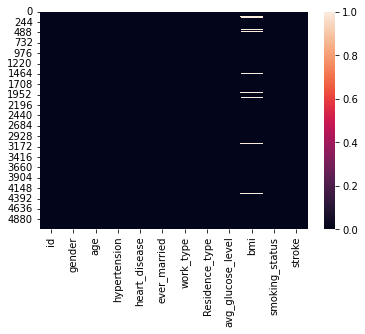

In [ ]:
sns.heatmap(df.isnull())

**NOTE:**

There are "Null" values ​​in the BMI column.

In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**NOTE:**

"Null" values ​​were filled with mean BMI values.

**EXPLORATORY DATA ANALYSIS** (EDA)

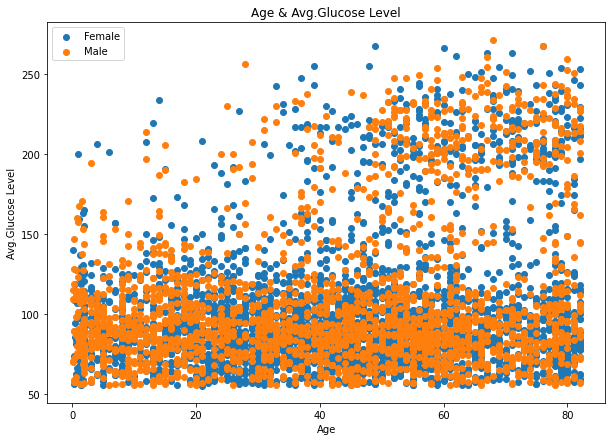

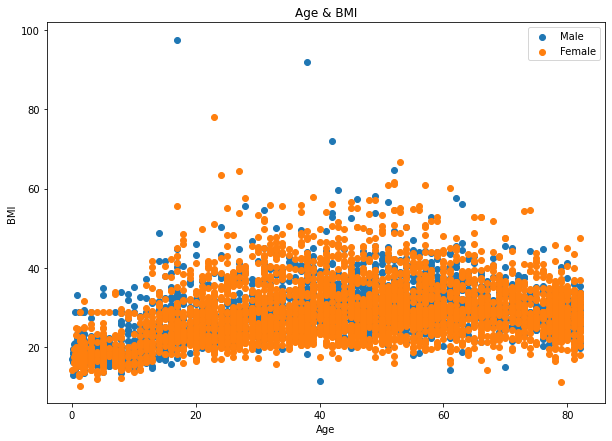

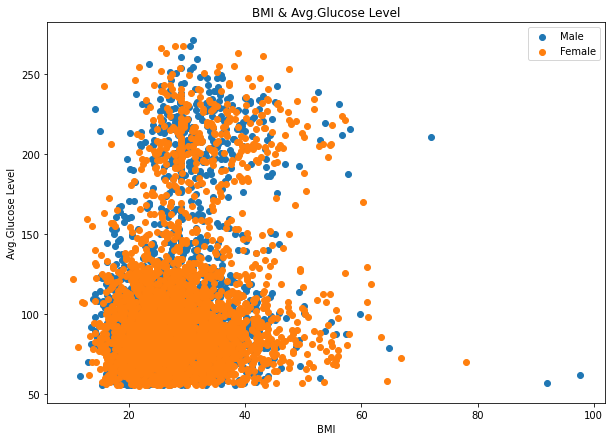

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Age & Avg.Glucose Level')
for gender in ['Female','Male']:
    plt.scatter(df[df.gender == gender].age, 
                df[df.gender == gender].avg_glucose_level,label = gender)    
plt.xlabel('Age')
plt.ylabel('Avg.Glucose Level')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title('Age & BMI')
for gender in ['Male', 'Female']:
    plt.scatter(df[df.gender == gender].age, 
                df[df.gender == gender].bmi,label = gender)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title('BMI & Avg.Glucose Level')
for gender in ['Male', 'Female']:
    plt.scatter(df[df.gender == gender].bmi, 
                df[df.gender == gender].avg_glucose_level,label = gender)
plt.xlabel('BMI')
plt.ylabel('Avg.Glucose Level')
plt.legend()
plt.show()

**NOTE:** 

When Age & Avg.Glucose Level is examined; It is seen that the "Avg. Glucose Level" value increases in the 40-80 age range for both women and men.

When Age & BMI examination is done; It is seen that the BMI value increases in individuals over the age of 20. It is seen that BMI is concentrated between 20-40 values ​​in the 20-80 age range.

When BMI & Avg.Glucose Level examination is done; It is seen that "Avg.Glucose Level" value is concentrated between 50-150 when BMI is between 20-40, and "Avg.Glucose Level" value is slightly more intense between 0-150 and 150-250 when BMI is between 40-60.

In [ ]:
categorical_ft = ['gender', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status']

print(f'The probability of men having stroke: {round(df[df["gender"]=="Male"]["stroke"].mean()*100,2)}%')
print(f'The probability of women having stroke: {round(df[df["gender"]=="Female"]["stroke"].mean()*100,2)}%')
print(f'Chances of hypertension in an Individual: {round(df[df["hypertension"]==1]["stroke"].mean()*100,2)}%')
print(f'The probability of an Individual having stroke with hypertension: {round(df[df["hypertension"]==0]["stroke"].mean()*100,2)}%')
print(f'The probability of an Individual having stroke with a heart condition: {round(df[df["heart_disease"]==1]["stroke"].mean()*100,2)}%')
print(f'The probability of an Individual having stroke without a heart condition: {round(df[df["heart_disease"]==0]["stroke"].mean()*100,2)}%')
print(f'Chances of a married person having a stroke: {round(df[df["ever_married"]=="Yes"]["stroke"].mean()*100,2)}%')
print(f'Chances of stroke in an unmarried person: {round(df[df["ever_married"]=="No"]["stroke"].mean()*100,2)}%') 

for i in categorical_ft:
    fig = px.histogram(df, x=i, color="stroke",width=400, height=400)
    fig.show()

The probability of men having stroke: 5.11%
The probability of women having stroke: 4.71%
Chances of hypertension in an Individual: 13.25%
The probability of an Individual having stroke with hypertension: 3.97%
The probability of an Individual having stroke with a heart condition: 17.03%
The probability of an Individual having stroke without a heart condition: 4.18%
Chances of a married person having a stroke: 6.56%
Chances of stroke in an unmarried person: 1.65%


**EXCERPTS FROM DATA**


Gender, Hypertension, Heart Disease, Marriage related graphs and % results were examined:

Men are more likely to have a stroke than women,

Individuals with hypertension are more likely to have a stroke than individuals without hypertension,

Individuals with heart disease are more likely to have a stroke than individuals without heart disease.

Married individuals are more likely to have a stroke than unmarried individuals.

In addition to this information, a few more investigations will be made.

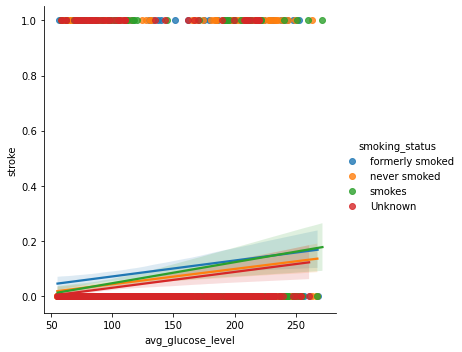

In [ ]:
sns.lmplot(data = df, x = 'avg_glucose_level', y = 'stroke', hue = 'smoking_status')

**NOTE:**

As the 'Avg.Glucose Level' value increases, we see that the probability of having a stroke in individuals who have smoked before or are currently using increases compared to individuals who have never smoked.

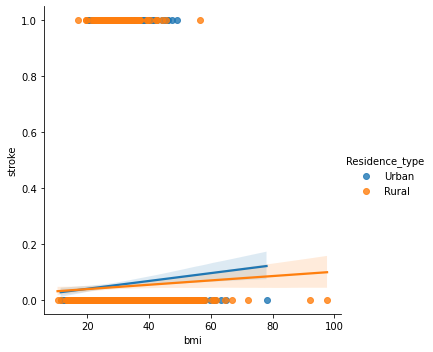

In [ ]:
sns.lmplot(data = df, x = 'bmi', y = 'stroke', hue = 'Residence_type')


**NOTE:**

As the 'BMI' value increases, we see that the probability of having a stroke increases compared to the individuals living in the rural areas.

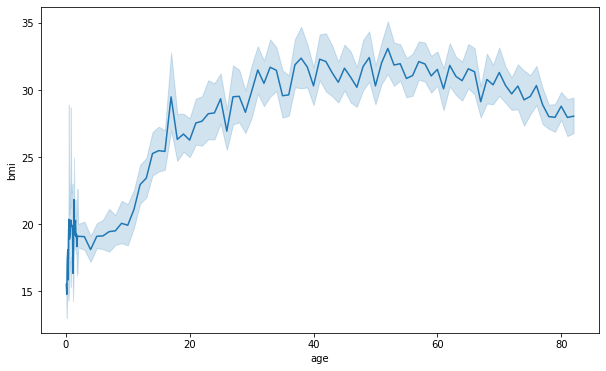

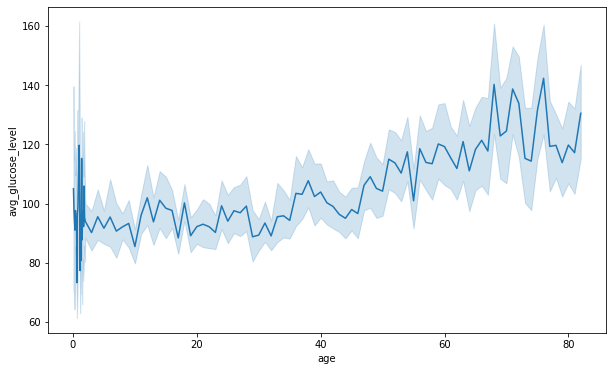

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = df['age'], y = df['bmi'])

plt.figure(figsize = (10,6))
sns.lineplot(x = df['age'], y = df['avg_glucose_level'])

**NOTE:**

When the 'Age & BMI' line graph is examined; It is seen that there is a rapid increase in the BMI value in the 0-20 age range, BMI also rises with the increase in age in the 20-50 age range, and in the 50-80 age range, the BMI progresses in the direction of decrease with the increase in age.

When the 'Age & Avg.Glucose Level' graph is examined; It is seen that the Avg.Glucose value remains constant with the increase in age in the 0-30 age range, and the Avg.Glucose value increases as the age increases, although a few deviations are observed in the 40-80 age range.

<Figure size 1080x1080 with 0 Axes>

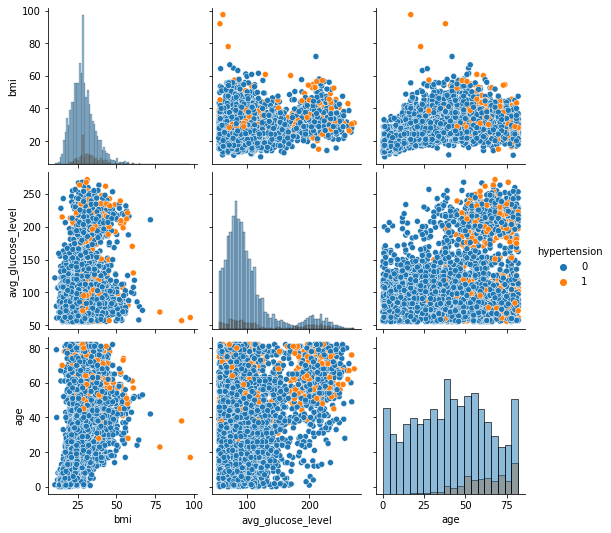

In [ ]:
plt.figure(figsize = (15,15))
sns.pairplot(df, x_vars = ['bmi', 'avg_glucose_level', 'age'], y_vars = ['bmi', 'avg_glucose_level', 'age'], hue = 'hypertension', diag_kind = 'hist')

<Figure size 1080x1080 with 0 Axes>

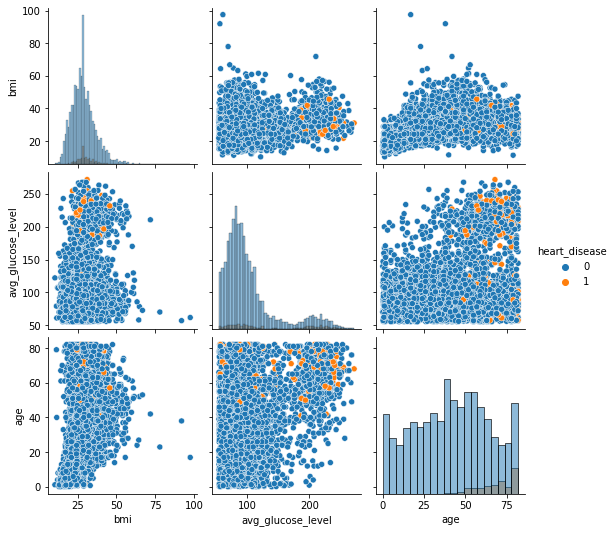

In [ ]:
plt.figure(figsize = (15,15))
sns.pairplot(df, x_vars = ['bmi', 'avg_glucose_level', 'age'], y_vars = ['bmi', 'avg_glucose_level', 'age'], hue = 'heart_disease', diag_kind = 'hist')

**NOTE:**

It is seen that Avg.Glucose level and BMI value increase as age progresses in the 40-75 age range, and individuals with heart diseases and hypertension are more common.

**FEATURE ENGINEERING**

In [ ]:
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = ['sex', 'work', 'residence', 'smoke'])
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,Yes,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,Yes,202.21,28.893237,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,Yes,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,Yes,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,Yes,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,1,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,1,202.21,28.893237,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,1,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,1,0


**NOTE:**

If individuals have been or are currently married, the 'ever_married' column displays 'Yes', this expression has been digitized

In [ ]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

**NOTE:**

Scaling process was applied to 'Age - Avg.Glucose Level - BMI values ​​in the data set.

In [ ]:
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
df = df.drop('id', axis = 1)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


**NOTE:**

The ID column has been removed.

**MODEL BUILDING**

In [ ]:
x = df.drop('stroke', axis = 1)
y = df['stroke']


smote = SMOTE()

x_oversample, y_oversample = smote.fit_resample(x, y)

print(y.value_counts())
print(y_oversample.value_counts())

0    4861
1     249
Name: stroke, dtype: int64
1    4861
0    4861
Name: stroke, dtype: int64


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size = 0.30, random_state=10)

**NOTE:**


We split training and testing data by 70%, 30%

**LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
cr = classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1475
           1       0.84      0.85      0.85      1442

    accuracy                           0.85      2917
   macro avg       0.85      0.85      0.85      2917
weighted avg       0.85      0.85      0.85      2917



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_lr), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_lr), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_lr), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_lr), 2))

Precision Score:  0.84
Recall Score:  0.85
F1 Score:  0.85
Accuracy Score:  0.85
ROC AUC:  0.85


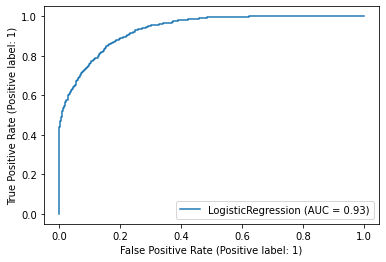

In [ ]:
plot_roc_curve(lr, x_test, y_test)

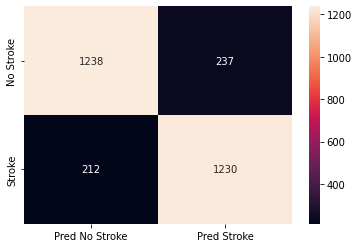

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1475
           1       0.93      0.98      0.95      1442

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_rf), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_rf), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rf), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_rf), 2))

Precision Score:  0.93
Recall Score:  0.98
F1 Score:  0.95
Accuracy Score:  0.95
ROC AUC:  0.95


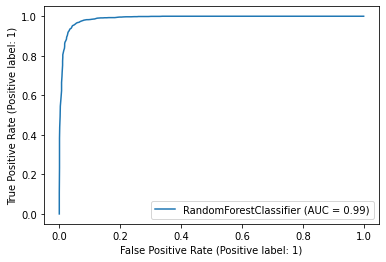

In [ ]:
plot_roc_curve(rf, x_test, y_test)

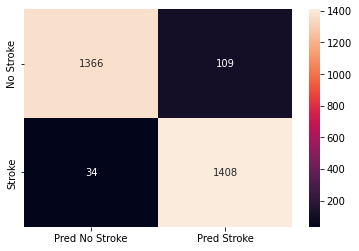

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

**K-NEAREST NEIGHBOURS**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1475
           1       0.84      0.98      0.91      1442

    accuracy                           0.90      2917
   macro avg       0.91      0.90      0.90      2917
weighted avg       0.91      0.90      0.90      2917



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_knn), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_knn), 2))

Precision Score:  0.84
Recall Score:  0.98
F1 Score:  0.91
Accuracy Score:  0.9
ROC AUC:  0.9


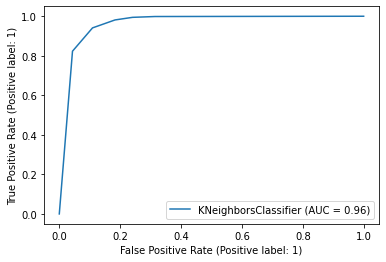

In [ ]:
plot_roc_curve(knn, x_test, y_test)

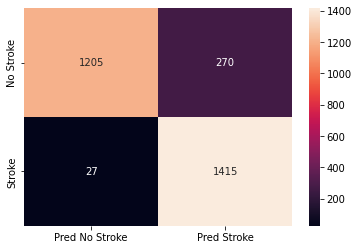

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

**ADABOOST**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
cr_ada = classification_report(y_test, y_pred_ada)
print(cr_ada)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1475
           1       0.80      0.89      0.84      1442

    accuracy                           0.84      2917
   macro avg       0.84      0.84      0.84      2917
weighted avg       0.84      0.84      0.84      2917



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_ada), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_ada), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_ada), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_ada), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_ada), 2))

Precision Score:  0.8
Recall Score:  0.89
F1 Score:  0.84
Accuracy Score:  0.84
ROC AUC:  0.84


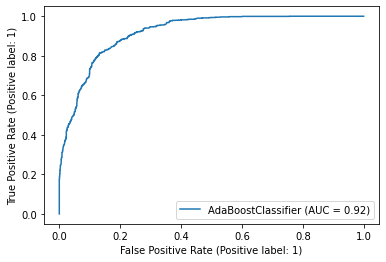

In [ ]:
plot_roc_curve(ada, x_test, y_test)

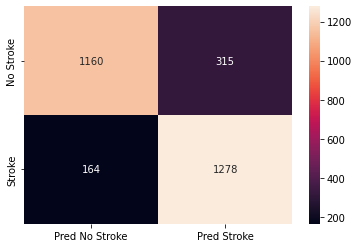

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_ada),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

**DECISION TREEE**

In [ ]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
cr_dtc = classification_report(y_test, y_pred_dtc)
print(cr_dtc)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1475
           1       0.89      0.91      0.90      1442

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_dtc), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_dtc), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_dtc), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_dtc), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_dtc), 2))

Precision Score:  0.89
Recall Score:  0.91
F1 Score:  0.9
Accuracy Score:  0.9
ROC AUC:  0.9


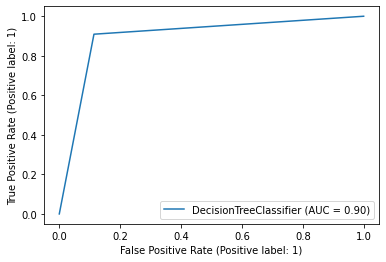

In [ ]:
plot_roc_curve(dtc, x_test, y_test)

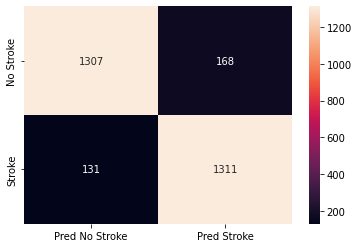

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_dtc),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

**Conclusion**

In [ ]:
def cv_comparison(models,x,y,cv):
    cv_accuracies = pd.DataFrame()
    accs = []
    pres = []
    recs = []
    f1s = []
    
    for model in models:
        acc = cross_val_score(model, x, y, scoring='accuracy', cv=cv)
        accs.append(acc)
        pre = cross_val_score(model, x, y, scoring='precision', cv=cv)
        pres.append(pre)
        rec = cross_val_score(model, x, y, scoring='recall', cv=cv)
        recs.append(rec)
        f1 = cross_val_score(model, x, y, scoring='f1', cv=cv)
        f1s.append(f1)
        cv_accuracies[str(model)] = [acc.mean(), pre.mean(), rec.mean(), f1.mean()]
    cv_accuracies.index = ['Accuracy', 'Precision', 'Recall', 'F1']
    return cv_accuracies, accs, pres, recs, f1s

In [ ]:
from sklearn.model_selection import cross_val_score,cross_validate

lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
dt = DecisionTreeClassifier()

models=[lr,rf,knn,ada,dt]

cv_df,accs, pres, recs, f1s = cv_comparison (models,x_test, y_test,10)

In [ ]:
cv_df

,LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()
Accuracy,0.845400,0.902981,0.850525,0.830637,0.840930
Precision,0.839604,0.871481,0.793558,0.801294,0.830616
Recall,0.850211,0.941743,0.944526,0.877280,0.853645
F1,0.844678,0.902729,0.862145,0.837008,0.841565


**FINAL NOTE:**

In the model, one of the predictive algorithms, Logistic Regression Random Forest K-Nearest Neighbors AdaBoost Decision Tree was used and compared with Cross Validation.

The best F1 score was chosen as Random Forest with 91%.

# UNSPERVISED LEARNING

In [ ]:
#printing the first 5 head columns
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
#printing the last 5 head columns
df.tail()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
5105,1.626390,1,0,1,-0.494658,4.615554e-16,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,1.670617,0,0,1,0.420775,1.442949e+00,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,-0.363842,0,0,1,-0.511443,2.217363e-01,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,0.343796,0,0,1,1.328257,-4.278451e-01,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5109,0.034205,0,0,1,-0.460867,-3.498953e-01,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:

df1 = df[['hypertension','heart_disease']]

In [ ]:
df1.head()

,hypertension,heart_disease
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0


In [ ]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'DISEASES')

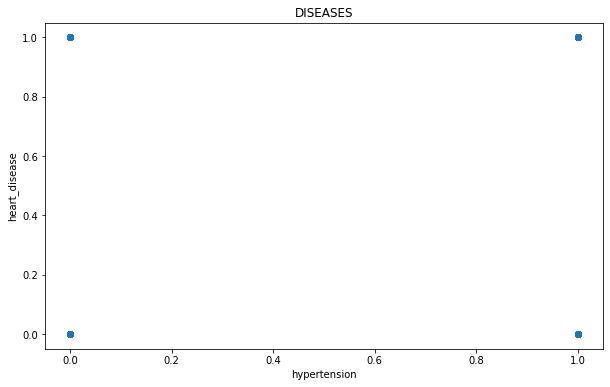

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(df['hypertension'], df['heart_disease'])
plt.xlabel('hypertension')
plt.ylabel('heart_disease')
plt.title('DISEASES')

In [ ]:
individual_clustering_score = []
for i in range (1, 5):
  kmeans = KMeans(n_clusters = i, init = "random", random_state = 42)
  kmeans.fit(df)
  individual_clustering_score.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 5), individual_clustering_score)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Clustering score')
plt.show()
  